<a href="https://colab.research.google.com/github/cs167/project-1-niclacey/blob/main/FINAL_Project1_Nicole%20Lacey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Nicole Lacey

# Project \#1 Starter Code: 
Your first step is to decide which dataset you would like to work with for this project. You can find the data on Blackboard. 

The options include: 
- [Ramen Ratings](https://www.kaggle.com/residentmario/ramen-ratings)
- [Chocolate Ratings](https://www.kaggle.com/rtatman/chocolate-bar-ratings)
- [World Happiness Data](https://www.kaggle.com/unsdsn/world-happiness)
- [Heart Failure Prediction](https://www.kaggle.com/fedesoriano/heart-failure-prediction)

Let's start by taking a look at these different datasets. (you can get rid of this once you decide which one you want to use). 

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
hap =pd.read_csv('/content/drive/MyDrive/Datasets/happiness_data.csv')
hap.head()

Mounted at /content/drive


,Overall rank,Year,Country or region,Score,GDP per capita,Social support and Family,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,2018,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,2018,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,2018,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,2018,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,2018,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


# Problem: 
Which dataset are you going to use? What questions are you going to ask about this dataset? Make sure that you can answer the question using ML models. What are your predictor variables and target variable?

I am going to use the **happiness** dataset. My target variable is **Score**, and my predictors are everything but Score and Country. I want to know if there is a significant feature in this, or if all of the predictors contribute equally. I will be able to see this based on how well a **tree performs vs. a knn algorithm**. I also want to know how accurate my model is, so I will use **MAE** and **MSE** to see how well it does. 

# Data Preparation
Explain your data prep. What did you do to get your data in the shape for your experiments? (e.g. creation of dummy variables, filling in missing values, etc). 

First, I looked at which columns have missing data. Only one has missing data, so I am going to **create dummy variables** where needed and then put the mean for missing values in **perceptions of corruption**. 
Note: It turns out no dummy variables are needed. 

In [2]:
print(hap.isna().any())

Overall rank                    False
Year                            False
Country or region               False
Score                           False
GDP per capita                  False
Social support and Family       False
Healthy life expectancy         False
Freedom to make life choices    False
Generosity                      False
Perceptions of corruption        True
dtype: bool


In [3]:
hap.head()

,Overall rank,Year,Country or region,Score,GDP per capita,Social support and Family,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,2018,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,2018,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,2018,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,2018,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,2018,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


I am realizing that there is one country for every score, so I am just not going to use that column at all. It's not necessary to guess the score. 

In [4]:
#Filling in missing values with the average
corrupt_mean = hap['Perceptions of corruption'].mean()
hap['Perceptions of corruption'].fillna(corrupt_mean, inplace=True)
print("after: ", hap['Perceptions of corruption'].isna().any())
hap.head(7)


after:  False


,Overall rank,Year,Country or region,Score,GDP per capita,Social support and Family,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,2018,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,2018,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,2018,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,2018,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,2018,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
5,6,2018,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295
6,7,2018,Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.291


# Metrics
Identify which metrics you will be using to test your model and say why they are appropriate.

I will be using metrics appropriate for a regression, so **MSE**, **MAE**, and **SD**. 

# Baseline Performance
Identify a baseline for your metrics - what would you expect to happen with this particular data if you always guessed the average or if you guessed randomly? What did some of the unsuccessful machine learning algorithms yield?

Some helpful links:
- [Sklearn Dummy Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)

In [5]:
# build and test a baseline model here
hap['Score'].mean()

5.379017902998729

I would guess the average is 5, because it is a scale out of 10. The actual average is 5.379. So any model that can find a closer value will be better than the mean. 

# Model planning and Execution
Identify which learning algorithms you have tried and which important parameters you’ve tuned for each one.


I am going to be trying a knn, sklearn knn, sknlearn weighted knn, tree, random tree, and then all of that on normalized data as well.  

In [6]:
# Execute your plan here (build and test your models to answer your question)

#first is knn regression 

shuffled_data = hap.sample(frac= 1, random_state = 41)

def knnregression(example, train_data, k):
  train_datacopy = train_data.copy()
  train_datacopy['distance_to_new'] = numpy.sqrt(
      (example['GDP per capita']- train_datacopy['GDP per capita'])**2
      +(example['Social support and Family'] - train_datacopy['Social support and Family'])**2
      +(example['Generosity'] - train_datacopy['Generosity'])**2
      +(example['Freedom to make life choices'] - train_datacopy['Freedom to make life choices'])**2
      +(example['Perceptions of corruption'] - train_datacopy['Perceptions of corruption'])**2
      +(example['Healthy life expectancy'] - train_datacopy['Healthy life expectancy'])**2)
  sorted_data = train_datacopy.sort_values(['distance_to_new'])
  return sorted_data.iloc[0:k]['Score'].mean()

def MSE(actual,predicted):
  squared = []
  csquared = (actual - predicted)**2
  squared.append(csquared)
  MSE = numpy.sum(squared)/(test_data['Score'].count())
  return MSE

def all_knn_mse(test_data,train_data,k):
  return test_data.apply(knnregression,args=(train_data,k),axis=1)

test_data = shuffled_data.iloc[0:500]
train_data = shuffled_data.iloc[500:]

test_data.shape
train_data.shape

(282, 10)

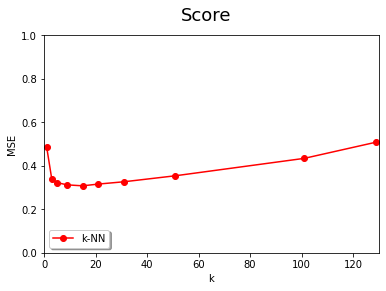

In [7]:
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

k_vals = [1,3,5,9,15,21,31,51,101,129, 500]
knn_mse = []

for k in k_vals:
    predictions = all_knn_mse(test_data,train_data,k)
    current_mse = MSE(test_data['Score'],predictions)
    knn_mse.append(current_mse)

plt.suptitle('Score',fontsize=18)
plt.xlabel('k')
plt.ylabel('MSE')
plt.plot(k_vals,knn_mse,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,0,1])

plt.show()

In [8]:
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler

#split the data
predictors = ['GDP per capita',	'Social support and Family',	'Healthy life expectancy', 
              'Freedom to make life choices',	'Generosity',	'Perceptions of corruption']
target = "Score"
train_data, test_data, train_sln, test_sln = \
        train_test_split(hap[predictors], hap[target], test_size = 0.2, random_state=41)


In [9]:
# make sure it looks okay
print('train_data shape: ',train_data.shape)
print('test_data shape: ',test_data.shape)
print('train_sln shape: ',train_sln.shape)
print('test_sln shape: ',test_sln.shape)

print(train_data.head())
print(test_data.head())
print(train_sln.head())
print(test_sln.head())

train_data shape:  (625, 6)
test_data shape:  (157, 6)
train_sln shape:  (625,)
test_sln shape:  (157,)
     GDP per capita  ...  Perceptions of corruption
294        0.275000  ...                   0.085000
555        1.027870  ...                   0.212860
584        0.740360  ...                   0.250280
347        1.070622  ...                   0.046669
660        1.207400  ...                   0.135860

[5 rows x 6 columns]
     GDP per capita  ...  Perceptions of corruption
333        1.107353  ...                   0.111093
603        1.094260  ...                   0.124250
143        0.357000  ...                   0.099000
700        0.474280  ...                   0.042320
20         1.233000  ...                   0.034000

[5 rows x 6 columns]
294    4.085
555    5.155
584    4.404
347    6.357
660    6.302
Name: Score, dtype: float64
333    6.635
603    3.974
143    3.692
700    5.286
20     6.711
Name: Score, dtype: float64


In [10]:
# kNN 
# create our model
neigh = neighbors.KNeighborsRegressor(n_neighbors=10)

# fit (train) the model to the data
neigh.fit(train_data, train_sln)

# use the trained model to get predictions from our test_data
predictions = neigh.predict(test_data)

# use a metric to see how good our predictions are
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

MSE:  0.2583534494418564
r2:  0.7907441919640464


In [11]:
# w-knn 
# create our model
neigh = neighbors.KNeighborsRegressor(n_neighbors=10, weights = 'distance')

# fit (train) the model to the data
neigh.fit(train_data, train_sln)

# use the trained model to get predictions from our test_data
predictions = neigh.predict(test_data)

# use a metric to see how good our predictions are
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

MSE:  0.24670061968015633
r2:  0.8001825111076766


In [12]:
decision = tree.DecisionTreeRegressor(criterion='mse', max_leaf_nodes= 8)
decision.fit(train_data, train_sln)
predictions = decision.predict(test_data)
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

MSE:  0.3942506709625031
r2:  0.6806729583088371


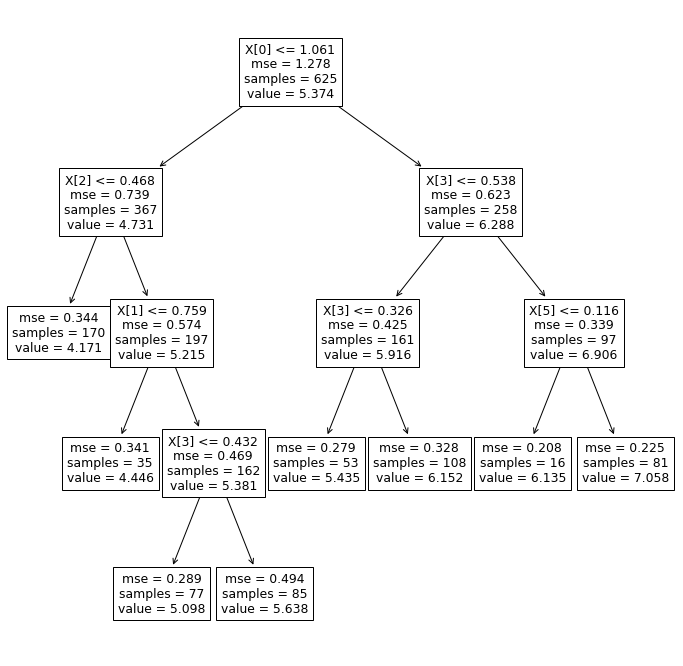

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12)) # Makes is to the graph isn't tiny
tree.plot_tree(decision);

In [14]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state = 0, n_estimators = 100)
forest.fit(train_data, train_sln)
predictions = forest.predict(test_data)
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

MSE:  0.22085768282030896
r2:  0.8211142410548185


This is all on **normalized** data after here. 

In [15]:
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

# run a knn
# using the nonweighted with small k 
neigh = neighbors.KNeighborsRegressor(n_neighbors=10)

# fit (train) the model to the data
neigh.fit(train_data_normalized, train_sln)

# use the trained model to get predictions from our test_data
predictions = neigh.predict(test_data_normalized)

# use a metric to see how good our predictions are
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

MSE:  0.2570793186662046
r2:  0.7917761861780912


In [16]:
neigh = neighbors.KNeighborsRegressor(n_neighbors=10, weights = 'distance')

# fit (train) the model to the data
neigh.fit(train_data_normalized, train_sln)

# use the trained model to get predictions from our test_data
predictions = neigh.predict(test_data_normalized)

# use a metric to see how good our predictions are
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

MSE:  0.24917127767644975
r2:  0.7981813784093836


In [17]:
decision = tree.DecisionTreeRegressor(criterion='mse', max_leaf_nodes= 8)
decision.fit(train_data_normalized, train_sln)
predictions = decision.predict(test_data_normalized)
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

MSE:  0.3942506709625031
r2:  0.680672958308837


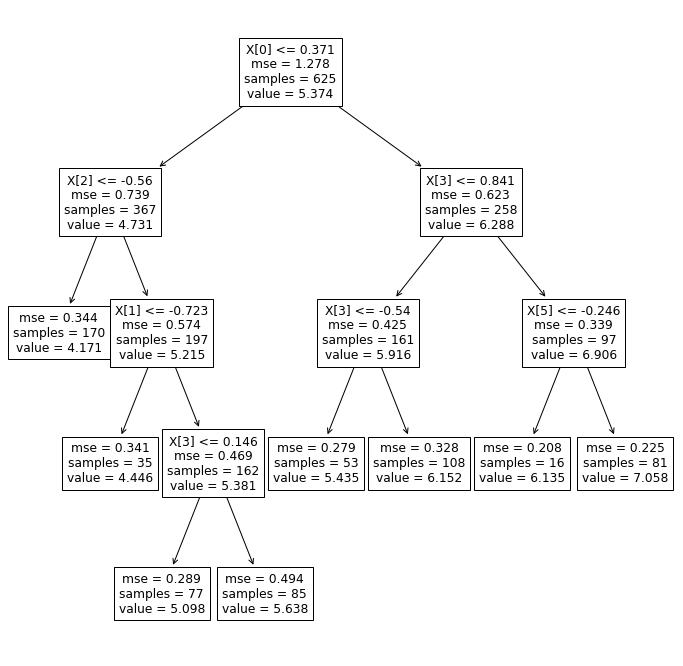

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12)) # Makes is to the graph isn't tiny
tree.plot_tree(decision);

In [36]:
forest = RandomForestRegressor(random_state = 0, n_estimators = 100, max_features = 3)
forest.fit(train_data_normalized, train_sln)
predictions = forest.predict(test_data_normalized)
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

MSE:  0.22775472068951289
r2:  0.8155279203167256


# Results
After you conduct your learning experiment, summarize the results you got. Include visualizations (i.e. graphs) where appropriate.  How did you find the best k, n, m or other variables that you needed to tune. 

Type     -            MSE   -   R^2 \
Manual Knn    -       .3-\
Knn            -      .25    -  .79\
W-Knn - .2467 - .8 \
Decision Tree - .39 - .68 \
**Forest - .2208 - .82** \
Normalized Knn - .257 - .791 \
Normalized W-Knn - .249 - .798 \
Normalized Decision Tree - .394 - .68\
Normalized Forest - .225 - .817    

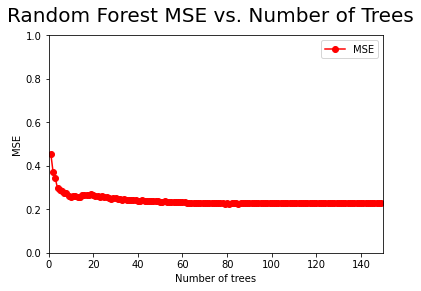

0.22635385202835476


In [34]:
import matplotlib.pyplot as plt
def tune_number_of_trees(n_estimator_values):
    randomforest_MSE = []
    for n in n_estimator_values:
        curr_randomforest = RandomForestRegressor(n_estimators=n, random_state=41)
        curr_randomforest.fit(train_data,train_sln)
        curr_predictions = curr_randomforest.predict(test_data)
        curr_MSE = metrics.mean_squared_error(test_sln,curr_predictions)
        randomforest_MSE.append(curr_MSE)

    plt.suptitle('Random Forest MSE vs. Number of Trees', fontsize=20)
    plt.xlabel('Number of trees')
    plt.ylabel('MSE')
    plt.plot(n_estimator_values,randomforest_MSE,'ro-', label = "MSE")
    plt.axis([0,n_estimator_values[-1]+1,0,1.0])
    plt.legend()
    plt.show()

    print(min(randomforest_MSE))
    
tune_number_of_trees(range(1,150))

MSEs lowest is at 18 so I will use 18 trees earlier in the project. 

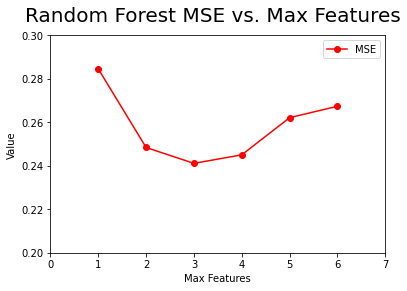

0.24113518626266991


In [35]:
def tune_max_features(max_features_values):
    randomforest_MSEs = []

    for m in max_features_values:
        currrf = RandomForestRegressor(n_estimators=17, max_features=m, random_state=41)
        currrf.fit(train_data, train_sln)
        curr_predictions = currrf.predict(test_data)
        curr_MSE = metrics.mean_squared_error(test_sln, curr_predictions)
        randomforest_MSEs.append(curr_MSE)

    plt.suptitle('Random Forest MSE vs. Max Features',fontsize=20)
    plt.xlabel('Max Features')
    plt.ylabel('Value')
    plt.plot(max_features_values,randomforest_MSEs,'ro-', label = "MSE")
    plt.axis([0,max_features_values[-1]+1,.2,.3])
    plt.legend()
    plt.show()

    print(min(randomforest_MSEs))
tune_max_features(range(1,7))

The lowest MSE is at 3 features so I will use that earlier in the project. 

# Bumps in the Road:
What challenges did you encounter? How did you overcome these challenges? Did you have to adapt your strategy to account for these challenges? Why or why not?


The first challenge I encountered was figuring out which graphs to use. I figured I should use all of them and so I made a code block for each so I wouldnt forget any. I also had a few experiemental problems, where I decided to try using the dummy regressor, which did not work. I then forgot I had used it and none of my datasets worked so I had to reload the Happiness dataset (this took a decent amount of time before I realized). I also sturggled to get the graphs working right for figuring out the right k, and number of trees to use. For K, on the homework the smaller values seemed to work better so I did trial and error for the best one. For trees, I was able to make a graph to see where the best number of trees to use was. 




# Conclusions
What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

Overall, the non-normalized decision forest was the best predictor, it had the lowest MSE (.22) and the highest R^2 (.82). I found it very interesting that the normalized model did not perform better. I do think that because this dataset is always on a 10.0 scale is probably wouldnt do much to change the bias. But I still would have expected otherwise. The model that did the worst for non-normalized was manually calculated knn algorithm. It had an MSE of .3 which is very high compared to the other ones. Between the normalized and the nonnormalized algorithms, the decision tree performed the worst. It had .39 MSE and .68 R^2 for both. This probably means that there arent any predictors that are especially good at predicting the target- Score. So all of the predictors do a good job contriubting to prediciting the happiness score. This would also explain why the knns performed well compared to the decision tree. 